In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahmedibrahim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedibrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#READING THE CLEAN DATASET AFTER REMOVING STOP WORDS

df = pd.read_csv('https://raw.githubusercontent.com/IshaSingh01/NLP_IBDM_Analysis/main/new_dataset.csv')




df.head()

,review,sentiment
0,reviewers mentioned watching oz episode youll ...,positive
1,wonderful production filming technique unassum...,positive
2,wonderful spend time hot summer weekend sittin...,positive
3,basically family boy jake thinks zombie closet...,negative
4,petter matteis love time money visually stunni...,positive


In [29]:
df.shape

(50000, 2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49998 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:>

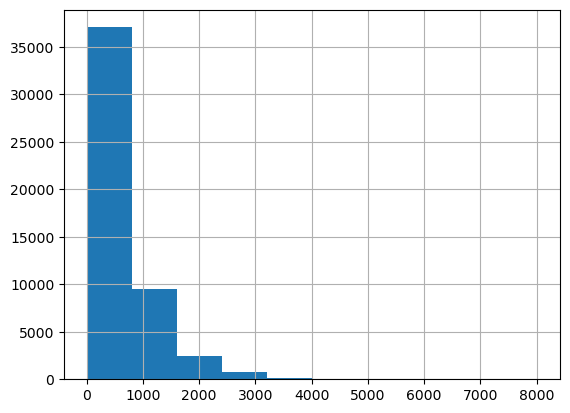

In [31]:
df['review'].str.len().hist()

In [32]:
#check if all the reviews are lower case
df['review'].str.islower().value_counts()

True    49998
Name: review, dtype: int64

In [33]:
df.describe().T

,count,unique,top,freq
review,49998,49573,loved todays show variety solely cooking great...,5
sentiment,50000,2,positive,25000


In [34]:
#find <br> tags in the reviews
df['review'].str.contains('<br>').value_counts()

False    49998
Name: review, dtype: int64

In [35]:
df

,review,sentiment
0,reviewers mentioned watching oz episode youll ...,positive
1,wonderful production filming technique unassum...,positive
2,wonderful spend time hot summer weekend sittin...,positive
3,basically family boy jake thinks zombie closet...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,movie job creative original expecting lotta fu...,positive
49996,plot dialogue acting idiotic directing annoyin...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,disagree previous comment side maltin rate exc...,negative


In [36]:
df_new = df[df['review'].notnull()]


from collections import Counter
cnt = Counter()
for text in df_new["review"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp


,word,count
0,movie,85161
1,film,75982
2,time,23944
3,story,22495
4,great,17924
5,movies,15702
6,made,15544
7,films,15519
8,make,15317
9,characters,14890


In [37]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [38]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
df_new["wo_stopfreq"] = df_new["review"].apply(lambda text: remove_freqwords(text))
df_new.head()

/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_39675/1894961945.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,review,sentiment,wo_stopfreq
0,reviewers mentioned watching oz episode youll ...,positive,reviewers mentioned watching oz episode youll ...
1,wonderful production filming technique unassum...,positive,wonderful production filming technique unassum...
2,wonderful spend time hot summer weekend sittin...,positive,wonderful spend hot summer weekend sitting air...
3,basically family boy jake thinks zombie closet...,negative,basically family boy jake thinks zombie closet...
4,petter matteis love time money visually stunni...,positive,petter matteis love money visually stunning wa...


In [39]:
df_new['review'].loc[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [40]:
df_new['wo_stopfreq'].loc[5]

'probably alltime favorite selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd'

In [41]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


wordnet_lem = WordNetLemmatizer()

df_new['wo_stopfreq_lem'] = df_new['wo_stopfreq'].apply(wordnet_lem.lemmatize)
df_new['wo_stopfreq_lem'].loc[1]

/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_39675/2344601811.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'wonderful production filming technique unassuming oldtimebbc fashion comforting discomforting realism entire piece actors extremely chosen michael sheen polari voices pat seamless editing guided references williams diary entries worth watching terrificly written performed piece masterful production masters comedy life realism home things fantasy guard traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating surface terribly'

### Tokenization

In [18]:
df_new

,review,sentiment,wo_stopfreq,wo_stopfreq_lem
0,reviewers mentioned watching oz episode youll ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,wonderful production filming technique unassum...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,wonderful spend time hot summer weekend sittin...,positive,wonderful spend hot summer weekend sitting air...,wonderful spend hot summer weekend sitting air...
3,basically family boy jake thinks zombie closet...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love time money visually stunni...,positive,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...
...,...,...,...,...
49995,movie job creative original expecting lotta fu...,positive,job creative original expecting lotta fun dvd ...,job creative original expecting lotta fun dvd ...
49996,plot dialogue acting idiotic directing annoyin...,negative,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...
49997,catholic taught parochial elementary schools n...,negative,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...
49998,disagree previous comment side maltin rate exc...,negative,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...


In [42]:
df_copy = df_new.copy()

nb=df_copy.drop(columns=['review','wo_stopfreq'])

nb.columns = ['sentiment','comments']

nb


,sentiment,comments
0,positive,reviewers mentioned watching oz episode youll ...
1,positive,wonderful production filming technique unassum...
2,positive,wonderful spend hot summer weekend sitting air...
3,negative,basically family boy jake thinks zombie closet...
4,positive,petter matteis love money visually stunning wa...
...,...,...
49995,positive,job creative original expecting lotta fun dvd ...
49996,negative,plot dialogue acting idiotic directing annoyin...
49997,negative,catholic taught parochial elementary schools n...
49998,negative,disagree previous comment side maltin rate exc...


In [43]:
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,comments
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend hot summer weekend sitting air...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love money visually stunning wa...
...,...,...
49995,1,job creative original expecting lotta fun dvd ...
49996,0,plot dialogue acting idiotic directing annoyin...
49997,0,catholic taught parochial elementary schools n...
49998,0,disagree previous comment side maltin rate exc...


In [44]:
tokenized_review=nb['comments'].apply(lambda x: x.split())
tokenized_review.sample(10)


36866    [strong, stomach, holden, years, filming, look...
44145    [pretentious, overrated, apocalypse, probably,...
26505    [shows, ive, subsequently, read, reviews, imdb...
9708     [disappointed, network, flix, attract, big, ac...
43037    [physicist, talk, blackholes, cosmology, heart...
37740    [medical, student, paula, henning, wins, place...
39623    [items, radar, pictures, drenched, simplicity,...
47319    [large, bed, possessed, demon, eats, things, m...
6826     [add, list, caricatures, southern, preacher, c...
44206    [expecting, caged, heat, lines, ilsa, wicked, ...
Name: comments, dtype: object

4.7 TF-IDF: Term Frequency-Inverse Document Frequency

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['comments'])



In [46]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'],test_size=0.20,random_state=30)

In [53]:
#Multinominal NB model:

from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

MNB = MultinomialNB()
MNB.fit(x_train, y_train)

predicted = MNB.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 85.91%
------------------------------------------------
Confusion Matrix:
      0     1
0  4274   736
1   673  4317
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5010
           1       0.85      0.87      0.86      4990

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [54]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 85.91%


In [58]:
ROC_auc_score = roc_auc_score(y_test, MNB.predict_proba(x_test)[:,1])


print('ROC_AUC_score_mnb = '+str('{:4.2f}'.format(ROC_auc_score*100))+'%')

ROC_AUC_score_mnb = 93.44%


0.9344106576426305


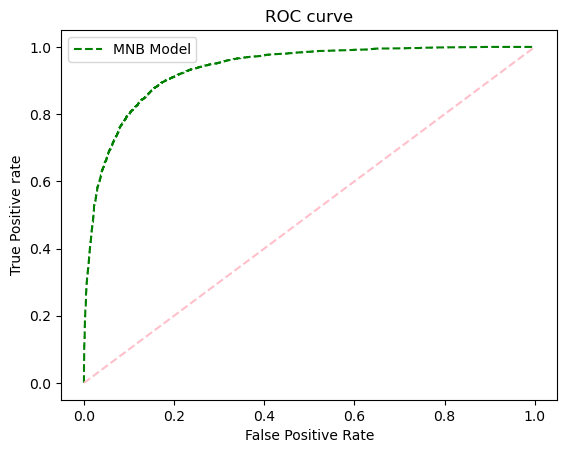

In [60]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
#CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(x_test)
#BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
#fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
#fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
#auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
#auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_MNB)

# plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
#plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()